In [1]:
import pandas as pd
import numpy as np
import keras
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
import os
import csv
import pickle

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from sklearn import preprocessing
from autokeras.image.image_supervised import load_image_dataset

import keras
import numpy as np
from keras.applications import vgg16, inception_v3, resnet50, mobilenet
 


from IPython.display import display
pd.set_option('display.max_rows',5)
pd.set_option('precision',3)

from IPython.core.display import HTML
HTML("<style>.container { width:100% !important;}</style>")

/Users/lovelife/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
all_train_images=os.listdir("./data/box/images")
#print(len(all_train_images))
labels=[x.split("_")[0] for x in all_train_images]
labels_my=[int(x.split("_")[1].split('.png')[0]) for x in all_train_images]
labels_my

# trail all, delete

filt=pd.DataFrame({'image':all_train_images,'label':labels,'num':labels_my})
filt
all_train_images=filt['image'].tolist()
labels=filt['label'].tolist()

with open('train_label.csv', 'w') as train_csv:
    fieldnames = ['File Name', 'Label']
    writer = csv.DictWriter(train_csv, fieldnames=fieldnames)
    writer.writeheader()
    for i in range(len(all_train_images)):
        writer.writerow({'File Name': all_train_images[i], 'Label':labels[i]})
    train_csv.close()

x_train, y_train = load_image_dataset(csv_file_path="train_label.csv",
                                      images_path="./data/box/images")
print(x_train.shape)
print(y_train.shape)


filt = pd.read_csv('./val/val_annotations.txt', sep="\t", header=None)
filt.columns=['image','label','a','b','c','d']
filt['image']=filt['image'].apply(lambda x: x.split('.')[0]+'.png')

all_train_images=filt['image'].tolist()
labels=filt['label'].tolist()

with open('valid_label.csv', 'w') as train_csv:
    fieldnames = ['File Name', 'Label']
    writer = csv.DictWriter(train_csv, fieldnames=fieldnames)
    writer.writeheader()
    for i in range(len(all_train_images)):
        writer.writerow({'File Name': all_train_images[i], 'Label':labels[i]})
    train_csv.close()
    
x_valid, y_valid = load_image_dataset(csv_file_path="valid_label.csv",
                                      images_path="./data/val/box/images")
print(x_valid.shape)
print(y_valid.shape)


all_train_images=os.listdir("./data/test/box/images")
labels=['unknow' for x in all_train_images]
labels_my=['unknow' for x in all_train_images]


filt=pd.DataFrame({'image':all_train_images,'label':labels,'num':labels_my})
all_train_images=filt['image'].tolist()
labels=filt['label'].tolist()
import csv
with open('test_label.csv', 'w') as train_csv:
    fieldnames = ['File Name', 'Label']
    writer = csv.DictWriter(train_csv, fieldnames=fieldnames)
    writer.writeheader()
    for i in range(len(all_train_images)):
        writer.writerow({'File Name': all_train_images[i], 'Label':labels[i]})
    train_csv.close()
    
x_test, y_test = load_image_dataset(csv_file_path="test_label.csv",
                                      images_path="./data/test/box/images")
print(x_test.shape)


(100000,)


In [5]:
x_train = x_train.astype("float") / 255.0
x_valid = x_valid.astype("float") / 255.0
x_test = x_test.astype("float") / 255.0

In [6]:
le = preprocessing.LabelEncoder()
le.fit(y_train)
y_train1=le.transform(y_train) 
y_train2= keras.utils.to_categorical(y_train1, 200)
y_valid1=le.transform(y_valid) 
y_valid2= keras.utils.to_categorical(y_valid1, 200)

In [9]:
from keras.layers.normalization import BatchNormalization
from keras import optimizers

drop_outs=[0.3]
IMG_SIZE=32
filter_bases=[128]

for drop_out in drop_outs:
    for filter_base in filter_bases:
        mid_filter=filter_base*2
        high_filter=filter_base*2
        print(drop_out,filter_base,mid_filter,high_filter)
        model = Sequential()
        model.add(Conv2D(filter_base, kernel_size = (3,3),padding='same', activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)))
        model.add(MaxPooling2D(pool_size=(2,2)))
        model.add(BatchNormalization())
        model.add(Conv2D(mid_filter, kernel_size=(3,3),padding='same', activation='relu'))
        model.add(MaxPooling2D(pool_size=(2,2)))
        model.add(BatchNormalization())
        model.add(Conv2D(mid_filter, kernel_size=(3,3),padding='same', activation='relu'))
        model.add(MaxPooling2D(pool_size=(2,2)))
        model.add(BatchNormalization())
        model.add(Conv2D(mid_filter, kernel_size=(3,3),padding='same', activation='relu'))
        model.add(MaxPooling2D(pool_size=(2,2)))
        model.add(BatchNormalization())
        model.add(Dropout(drop_out))
        model.add(Flatten())
        model.add(Dense(256, activation='relu'))
        model.add(Dropout(drop_out))
        model.add(Dense(200, activation = 'softmax'))

        model.compile(loss='categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])
        print(model.summary())
        history= model.fit(x_train, y_train2, shuffle=True, batch_size = 128, epochs = 15, verbose = 1, validation_data=(x_valid, y_valid2))


0.3 128 256 256
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 128)       3584      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 128)       0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 16, 16, 128)       512       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 256)       295168    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 256)         0         
_________________________________________________________________
batch

In [16]:
y_predict_p1=model.predict(x_test)
y_predict_p1_1= [np.argmax(y, axis=None, out=None) for y in y_predict_p1]
y_predict_p1_2=le.inverse_transform(y_predict_p1_1)
y_predict_p1_2

array(['n03992509', 'n02699494', 'n04501370', ..., 'n02481823',
       'n03026506', 'n04133789'], dtype='<U9')

In [17]:
# Score trained model.
scores = model.evaluate(x_train, y_train2, verbose=1)
print('Train loss:', scores[0])
print('Train accuracy:', scores[1])
scores = model.evaluate(x_valid, y_valid2, verbose=1)
print('Validation loss:', scores[0])
print('Validation accuracy:', scores[1])

100000/100000 [==============================] - 25s 246us/step
Train loss: 1.141592525024414
Train accuracy: 0.70272
10000/10000 [==============================] - 2s 247us/step
Validation loss: 3.2589765857696533
Validation accuracy: 0.31


In [0]:
import csv
with open('y_predicted_p1.csv', 'w') as train_csv:
    fieldnames = ['Label']
    writer = csv.DictWriter(train_csv, fieldnames=fieldnames)
    writer.writeheader()
    for i in range(len(y_predict_p1_2)):
        writer.writerow({ 'Label':y_predict_p1_2[i]})
    train_csv.close()

In [19]:
import matplotlib.pyplot as plt
history_dict=history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

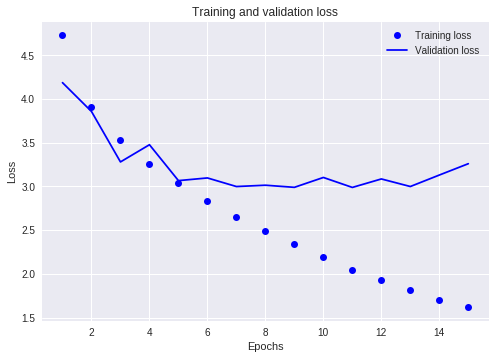

In [20]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

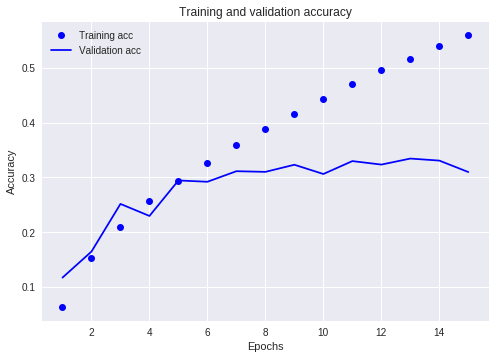

In [21]:
plt.clf()
acc = history_dict['acc']
val_acc = history_dict['val_acc']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()